<a href="https://colab.research.google.com/github/NiharikaAmritkar/AI-ML/blob/main/NLP_Spamcollection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

In [ ]:
msg= [line.rstrip() for line in open('/content/SMSSpamCollection')]

In [ ]:
print(len(msg))

5574


In [ ]:
  msg[50]

'ham\tWhat you thinked about me. First time you saw me in class.'

In [ ]:
for mess_no, msg in enumerate (msg[:10]):
  print(mess_no, msg)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [ ]:
  import pandas as pd

In [ ]:
msg= pd.read_csv('/content/SMSSpamCollection', sep='\t', names= ['label', 'messages'])

In [ ]:
msg.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
msg.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
msg.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [ ]:
msg['length']= msg['messages'].apply(len)

In [ ]:
msg.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

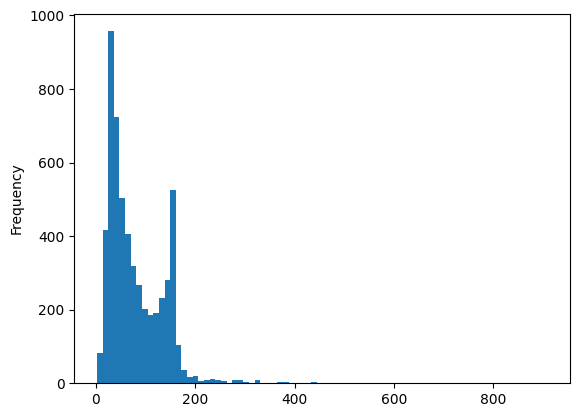

In [ ]:
msg['length'].plot.hist(bins= 80)

In [ ]:
msg['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

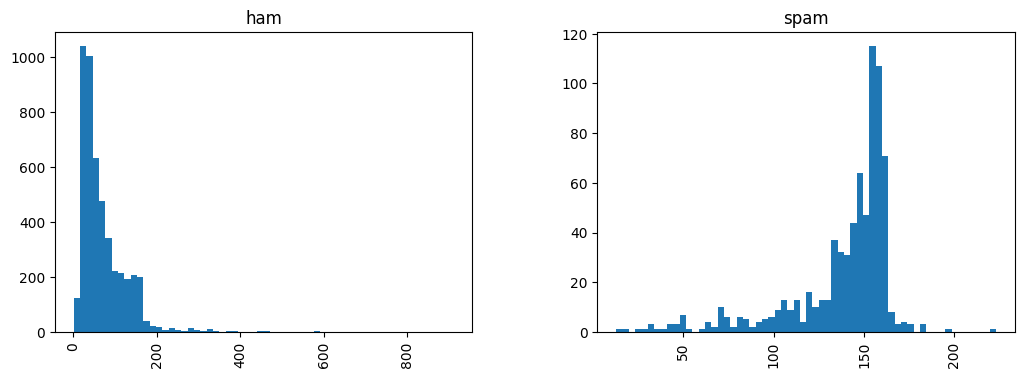

In [ ]:
msg.hist(column= 'length', by='label', bins= 60, figsize=(12, 4)) #length can be a good feature to distinguish for spam msgs

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import re

In [ ]:
msg

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [ ]:
#tool to remove unnecessary words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import string

In [ ]:
mess= 'Sample message! Notice: it has punctuation'
nopn= [c for c in mess if not c in string.punctuation]
nopn= ''.join(nopn)
nopn= nopn.split()
nopn

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [ ]:
clean_mess= [word for word in nopn if word.lower() not in stopwords.words('english')]

In [ ]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [ ]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [ ]:
def text_process(mess):
  """
  1. remove punc
  2. clean text
  3. return list of clean text
  """
  nopunc= [char for char in mess if char not in string.punctuation]
  nopunc= ''.join(nopunc)
  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
msg['messages'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(analyzer=text_process).fit(msg['messages'])

In [ ]:
print(len(cv.vocabulary_))

11425


In [ ]:
mess4= msg['messages'][3]

In [ ]:
bow4= cv.transform([mess4])
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [ ]:
print(bow4.shape)

(1, 11425)


In [ ]:
mess_bow= cv.transform(msg['messages'])
print('shape of sparse matrix: ', mess_bow.shape)

shape of sparse matrix:  (5572, 11425)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf= TfidfTransformer().fit(mess_bow)

In [ ]:
msg_tf= tf.transform(mess_bow)

In [ ]:
from sklearn.naive_bayes import MultinomialNB


In [ ]:
spam_detect_model= MultinomialNB().fit(msg_tf, msg['label'])

In [ ]:
all_pred= spam_detect_model.predict(mess_bow)

In [ ]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test= train_test_split(msg['messages'], msg['label'], test_size= 0.3)

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline= Pipeline([
    ('bow', CountVectorizer(analyzer= text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [ ]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f22aeccc940>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [ ]:
predictions= pipeline.predict(msg_test)

In [ ]:
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1452
        spam       1.00      0.73      0.85       220

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672

